In [1]:
import numpy as np
from scipy.special import erfc
from scipy.optimize import curve_fit, fsolve
import matplotlib.pyplot as plt

In [8]:

#
# fileName = "./Beam_params.txt"
# Or use commandline arguments with fileName = sys.argv[1]...
# data1 = np.loadtxt(fileName)
# Load the data
data1 = np.array(
    [
        [0, 1.716],
        [1.35, 1.606],
        [1.55, 1.508],
        [1.68, 1.403],
        [1.75, 1.300],
        [1.86, 1.198],
        [1.98, 1.099],
        [1.99, 0.999],
        [2.05, 0.901],
        [2.11, 0.802],
        [2.17, 0.701],
        [2.23, 0.600],
        [2.30, 0.500],
        [2.355, 0.420],
        [2.375, 0.398],
        [2.46, 0.301],
        [2.59, 0.199],
        [2.81, 0.099],
        [2.94, 0.069],
        [3.975, 0.006],
    ]
)

data2 = np.array(
    [
        [0, 1.725],
        [2.68, 1.600],
        [2.85, 1.499],
        [2.95, 1.401],
        [3.06, 1.301],
        [3.14, 1.201],
        [3.22, 1.101],
        [3.30, 1.000],
        [3.37, 0.901],
        [3.44, 0.801],
        [3.51, 0.701],
        [3.58, 0.600],
        [3.65, 0.498],
        [3.74, 0.401],
        [3.84, 0.299],
        [3.96, 0.200],
        [4.15, 0.101],
        [4.39, 0.049],
        [5.07, 0.010],
    ]
)
z1 = 6.6 + 19.5
z2 = z1 + 62.7
z1 /= 100
z2 /= 100

In [3]:
# function to be fitted: P0/2*erfc(x) + Poffset; x = (r - r0) / (w / np.sqrt(2))
def func(r, P0, r0, w, Poffset):
    return P0 / 2 * erfc((r - r0) / (w / np.sqrt(2))) + Poffset

In [5]:
# Fit the data to the function
popt1, pcov1 = curve_fit(func, data1.T[0], data1.T[1])
# ,p0 = [estimates of ws], sigma= [uncertainties of Y - In this case we would need to redo the measurements at z1 for the same
# x position of the knife edge to see the uncertainties in power]
# ) # Same for the 2nd fit below.
popt2, pcov2 = curve_fit(func, data2.T[0], data2.T[1])


# Print the optimized parameters
print(z1)
perr1 = np.sqrt(np.diag(pcov1))
np.set_printoptions(precision=3, suppress=False)
print(
    f"Optimized parameters for z2: P0={popt1[0]} +/- {perr1[0]}, r0={popt1[1]} +/- {perr1[1]}, w={popt1[2]} +/- {perr1[2]}, Poffset={popt1[3]} +/- {perr1[3]}"
)
print(z2)
perr2 = np.sqrt(np.diag(pcov2))
print(
    f"Optimized parameters for z2: P0={popt2[0]} +/- {perr2[0]}, r0={popt2[1]} +/- {perr2[1]}, w={popt2[2]} +/- {perr2[2]}, Poffset={popt2[3]} +/- {perr2[3]}"
)
# print("Optimized parameters for z2: P0=%g, r0=%g, w=%g, Poffset=%g" % tuple(popt2))

0.261
Optimized parameters for z2: P0=1.6647380514304528 +/- 0.03136661323332396, r0=2.0785566081818283 +/- 0.01103111166593391, w=0.8153085635244979 +/- 0.030050898151638385, Poffset=0.021337793131019456 +/- 0.018702371442930688
0.8880000000000001
Optimized parameters for z2: P0=1.7095533171029529 +/- 0.009047625479901275, r0=3.3900801462682018 +/- 0.0035938050563717396, w=0.9527673631155847 +/- 0.009430791182780684, Poffset=0.008920643180641117 +/- 0.005267418855580055


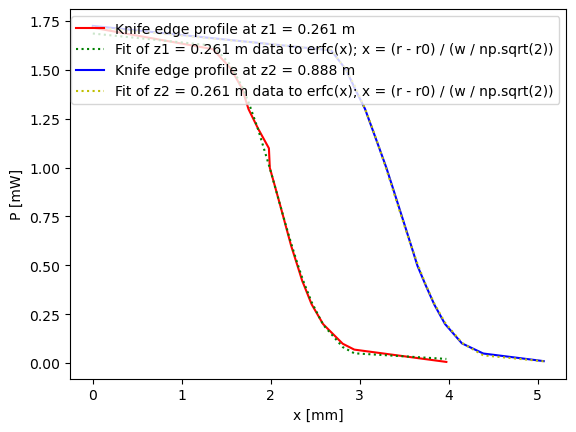

In [6]:
# Plot the data and the fitted function
plt.plot(data1.T[0], data1.T[1], "r-", label="Knife edge profile at z1 = 0.261 m")
plt.plot(
    data1.T[0],
    func(data1.T[0], *popt1),
    "g:",
    label="Fit of z1 = 0.261 m data to erfc(x); x = (r - r0) / (w / np.sqrt(2))",
)

plt.plot(data2.T[0], data2.T[1], "b-", label="Knife edge profile at z2 = 0.888 m")
plt.plot(
    data2.T[0],
    func(data2.T[0], *popt2),
    "y:",
    label="Fit of z2 = 0.261 m data to erfc(x); x = (r - r0) / (w / np.sqrt(2))",
)
plt.xlabel("x [mm]")
plt.ylabel("P [mW]")
plt.legend()
plt.show()

In [7]:
# fslove
# equations to be solved
def equations(vrs, z1, z2, zwaist, w0, waveLength):
    w1, w2 = vrs
    eq1 = w1 - w0 * np.sqrt(1 + (((z1 - zwaist) * waveLength) / (np.pi * w0**2)) ** 2)
    eq2 = w2 - w0 * np.sqrt(1 + (((z2 - zwaist) * waveLength) / (np.pi * w0**2)) ** 2)
    return [eq1, eq2]


# Guesses
w0 = 0.0001
zwaist = 0.0005
waveLength = 775e-9  # nm
initial_guesses = [popt1[2], popt2[2]]
w1, w2 = fsolve(equations, initial_guesses, args=(z1, z2, zwaist, w0, waveLength))

print(f"w1 = {w1:.8f}")
print(f"w2 = {w2:.8f}")

w1 = 0.00065036
w2 = 0.00219166
